<a href="https://colab.research.google.com/github/sohyeon98720/doitDeeplearning/blob/master/doitDeeplearning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 4-4 로지스틱 회귀
# 데이터셋 로드
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [2]:
# data shape 확인
print(cancer.data.shape,cancer.target.shape)

(569, 30) (569,)


In [3]:
# 데이터 확인
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

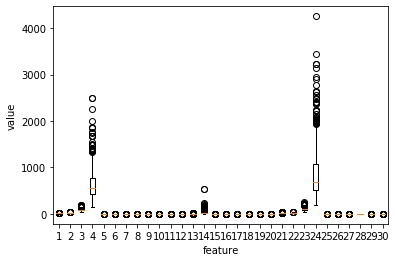

In [4]:
# boxplot을 이용하여 데이터 분포 살펴보기
import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [5]:
# 눈에 띄는 값의 인덱스 세개의 필드 이름 보기
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [6]:
# 0의 갯수는 212, 1의 갯수는 357개
# return_counts=False하면 뒤의 결과가 없음(= 값이 몇개인지 안 세줌)
import numpy as np
np.unique(cancer.target,return_counts=True)

(array([0, 1]), array([212, 357]))

In [0]:
x=cancer.data
y=cancer.target

In [0]:
# 데이터셋을 test,train으로 분류해주는 모듈
from sklearn.model_selection import train_test_split

In [0]:
# stratify=y -> 클래스 비율이 불균형한 경우 써줌
# test_size=0.2 -> 데이터의 20%를 테스트세트로 지정
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [10]:
# 나눈 뒤 데이터 갯수 보기
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


In [11]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([170, 285]))

In [0]:
# 로지스틱회귀 모델클래스
class LogisticNeuron:

  def __init__(self):
    self.w=None
    self.b=None

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1*err
    return w_grad,b_grad
  
  def activation(self,z):
    a=1/(1+np.exp(-z)) # 시그모이드
    return a

  def fit(self,x,y,epochs=100):
    self.w=np.ones(x.shape[1])
    self.b=0
    for i in range(epochs):
      for x_i,y_i in zip(x,y):
        z=self.forpass(x_i)
        a=self.activation(z)
        err=-(y_i-a)
        w_grad,b_grad=self.backprop(x_i,err)
        self.w-=w_grad
        self.b-=b_grad
  
  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    a=self.activation(np.array(z))
    return a>0.5
    # 0.5가 넘는 값을 가진다는건 유의미하다는 뜻

In [13]:
neuron=LogisticNeuron()
neuron.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


In [14]:
np.mean(neuron.predict(x_test)==y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


0.8245614035087719

In [0]:
# 단일신경망 모델 구축
class singleLayer:

  def __init__(self):
    self.w=None
    self.b=None
    self.losses=[]

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1*err
    return w_grad,b_grad
  
  def add_bias(self,x):
    return np.c_[np.ones((x.shape[0])),x]

  def activation(self,z):
    a=1/(1+np.exp(-z))
    return a

  def fit(self,x,y,epochs=100):
    self.w=np.ones(x.shape[1])
    self.b=0
    for i in range(epochs):
      loss=0
      indexes=np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z=self.forpass(x[i])
        a=self.activation(z)
        err=-(y[i]-a)
        w_grad,b_grad=self.backprop(x[i],err)
        self.w-=w_grad
        self.b-=b_grad
        a=np.clip(a,1e-10,1-1e-10)
        loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
  
  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    return np.array(z)>0

  def score(self,x,y):
    return np.mean(self.predict(x)==y)

In [16]:
layer=singleLayer()
layer.fit(x_train,y_train)
layer.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.868421052631579

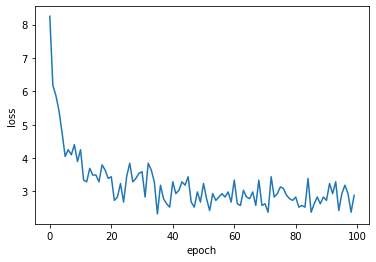

In [17]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [0]:
# 위의 과정을 모듈로 구현하기
# SGD는 확률적 경사하강법, 손실함수는 로그함수
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log',max_iter=100,tol=1e-3,random_state=42)

In [19]:
sgd.fit(x_train,y_train)
sgd.score(x_test,y_test)

0.8333333333333334

In [20]:
# 예측한 결과
sgd.predict(x_test[0:20])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [21]:
# 실제 결과
y_test[0:20]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])